In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import work.prepare as wp

RND_STATE = 42

## Import

In [2]:
data_all = pd.read_csv(Path("work/data/001_winequality-red.csv"))
wp.dataFrame_describe(data_all)

rows_count = 1599
columns = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'quality', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
---
alcohol                  : float64  min=8.4 max=14.9
chlorides                : float64  min=0.012 max=0.611
citric acid              : float64  min=0.0 max=1.0
density                  : float64  min=0.99007 max=1.00369
fixed acidity            : float64  min=4.6 max=15.9
free sulfur dioxide      : float64  min=1.0 max=72.0
pH                       : float64  min=2.74 max=4.01
quality                  : int64    unique_count=6 min=3 max=8
residual sugar           : float64  min=0.9 max=15.5
sulphates                : float64  min=0.33 max=2.0
total sulfur dioxide     : float64  min=6.0 max=289.0
volatile acidity         : float64  min=0.12 max=1.58


In [3]:
TEST_RATIO = 0.2

# quality is important and it's enum, hence will directly use stratify
data_train, data_test = wp.split_stratify(data_all, column_name="quality", test_size=TEST_RATIO, random_state=RND_STATE)

In [4]:
data_train.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,10.424446,0.088934,0.273878,0.996735,8.306489,16.127834,3.308585,5.637217,2.543589,0.663675,47.280688,0.528073
std,1.065672,0.050981,0.194902,0.001852,1.695325,10.473562,0.151599,0.808633,1.375697,0.178360,33.334786,0.177710
min,8.400000,0.012000,0.000000,0.990070,4.600000,1.000000,2.740000,3.000000,0.900000,0.370000,6.000000,0.120000
25%,9.500000,0.070000,0.100000,0.995600,7.100000,7.000000,3.210000,5.000000,1.900000,0.550000,22.000000,0.395000
50%,10.200000,0.080000,0.260000,0.996750,7.900000,14.000000,3.310000,6.000000,2.200000,0.620000,39.000000,0.520000
75%,11.100000,0.091000,0.430000,0.997800,9.300000,22.000000,3.400000,6.000000,2.600000,0.740000,64.000000,0.635000
max,14.900000,0.611000,1.000000,1.003690,15.900000,68.000000,3.900000,8.000000,15.400000,2.000000,289.000000,1.580000


In [5]:
data = data_train.drop("quality", axis=1)
data_labels = data_train["quality"].copy()

## Correlation

fixed acidity             citric acid               |  0.66  0.66
fixed acidity             density                   |  0.67  0.67
pH                        fixed acidity             | -0.67 -0.67
total sulfur dioxide      free sulfur dioxide       |  0.66  0.66


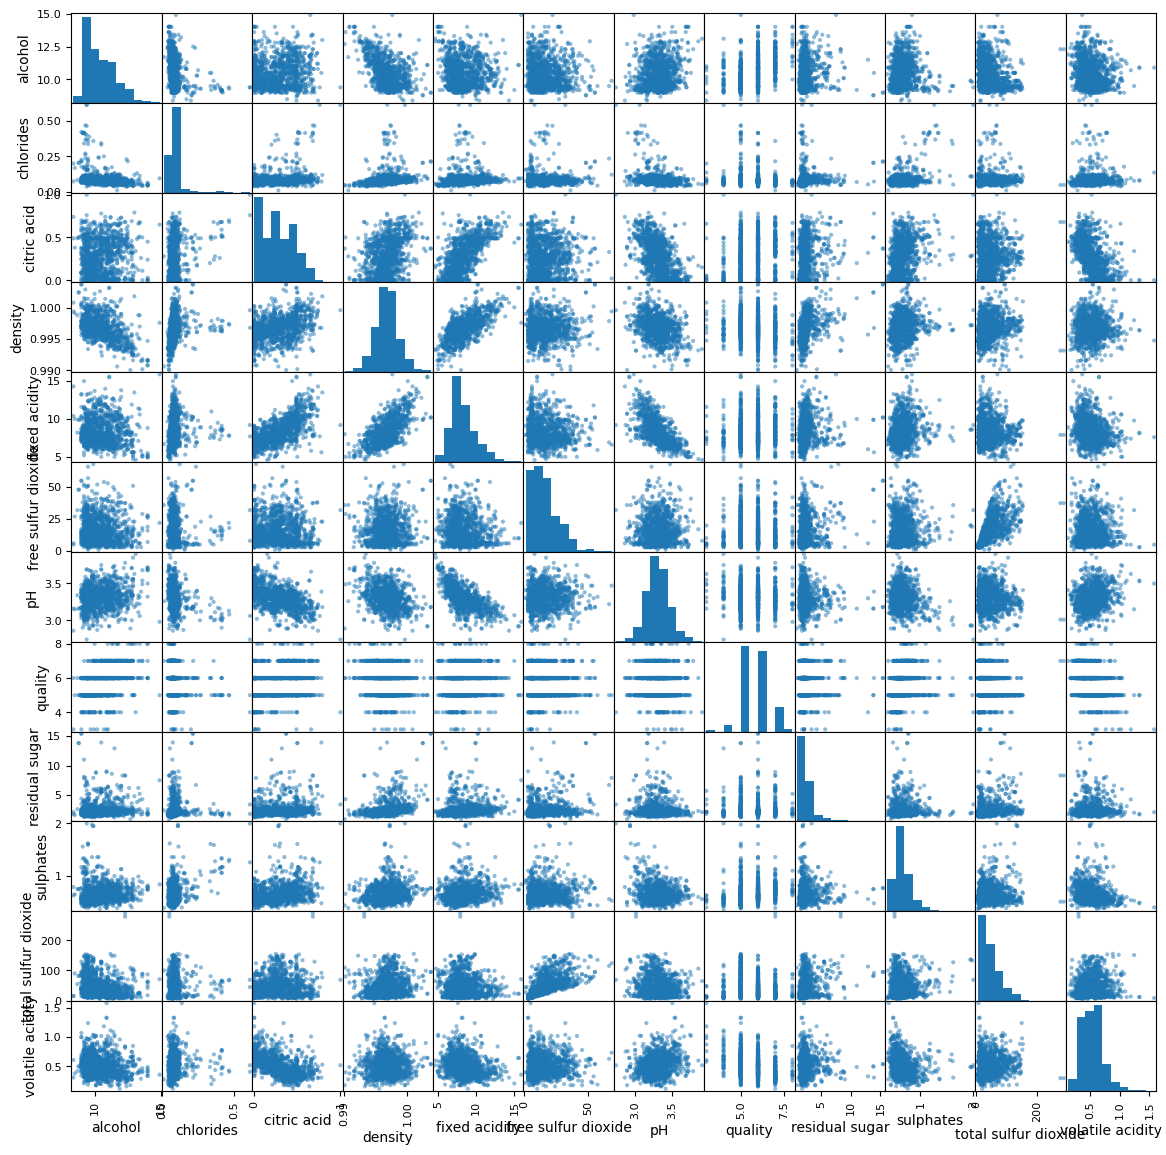

In [6]:
wp.correlations_describe(data_train, figsize=(14, 14))

## Impute

In [23]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data_imputed.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,10.424446,0.088934,0.273878,0.996735,8.306489,16.127834,3.308585,2.543589,0.663675,47.280688,0.528073
std,1.065672,0.050981,0.194902,0.001852,1.695325,10.473562,0.151599,1.375697,0.178360,33.334786,0.177710
min,8.400000,0.012000,0.000000,0.990070,4.600000,1.000000,2.740000,0.900000,0.370000,6.000000,0.120000
25%,9.500000,0.070000,0.100000,0.995600,7.100000,7.000000,3.210000,1.900000,0.550000,22.000000,0.395000
50%,10.200000,0.080000,0.260000,0.996750,7.900000,14.000000,3.310000,2.200000,0.620000,39.000000,0.520000
75%,11.100000,0.091000,0.430000,0.997800,9.300000,22.000000,3.400000,2.600000,0.740000,64.000000,0.635000
max,14.900000,0.611000,1.000000,1.003690,15.900000,68.000000,3.900000,15.400000,2.000000,289.000000,1.580000


## Normalize

Attribute                | Normalization | Scaller
---|---|---
alcohol                  | yeo-johnson | std
chlorides                | log | std
citric acid              | quantile | one-hot
density                  | 1 | min-max
fixed acidity            | log | std
free sulfur dioxide      | quantile | one-hot
pH                       | 1 | min-max
residual sugar           | arctan | std
sulphates                | log | std
total sulfur dioxide     | yeo-johnson | std
volatile acidity         | arctan | std

### transformers

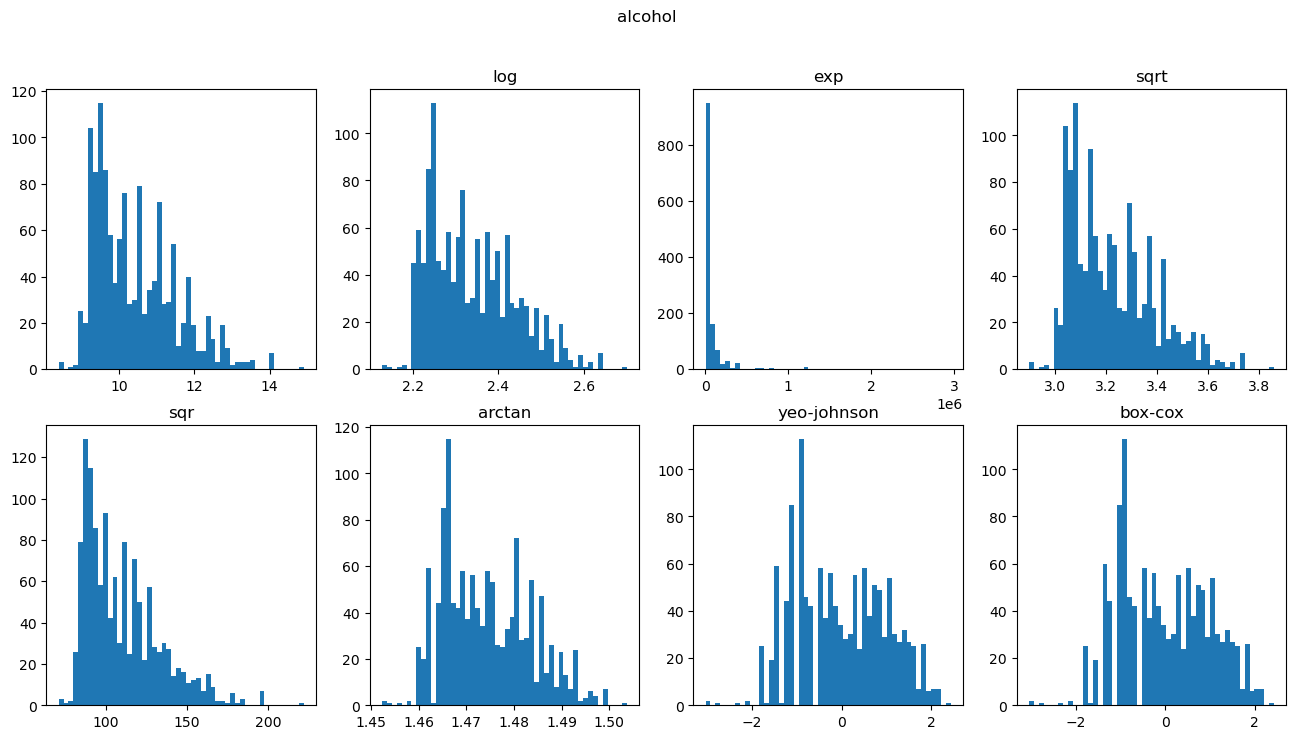

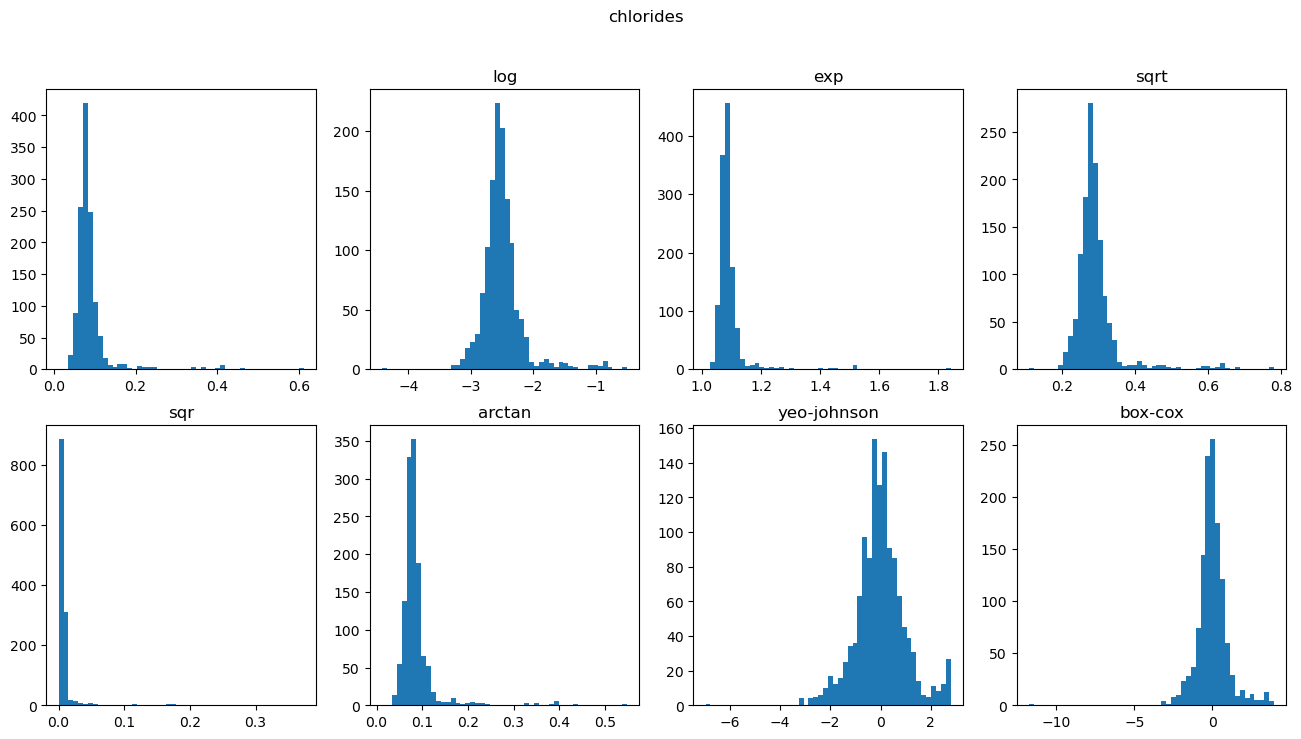

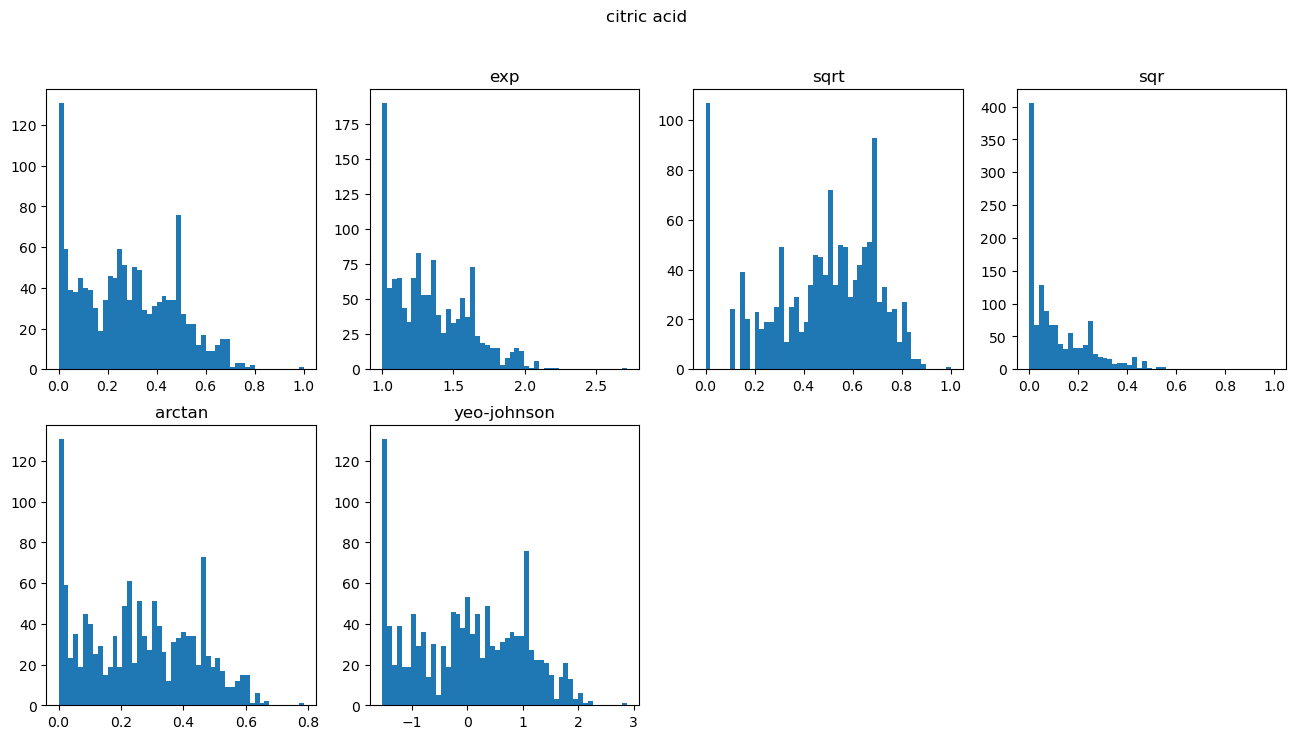

/home/jovyan/work/prepare.py:255: UserWarning: log: data set needs to be positive
  warnings.warn(f'{transformation_names[i]}: {validation_errors[i]}')
/home/jovyan/work/prepare.py:255: UserWarning: box-cox: data set needs to be positive
  warnings.warn(f'{transformation_names[i]}: {validation_errors[i]}')


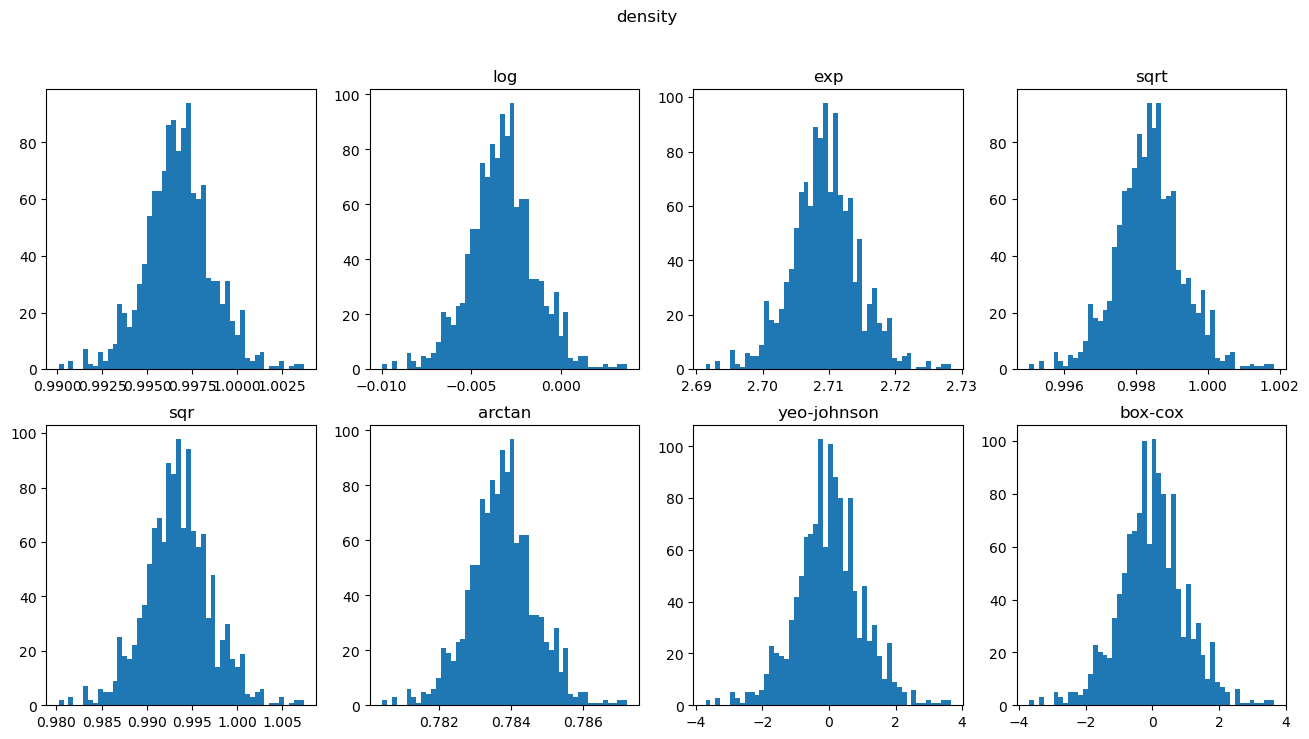

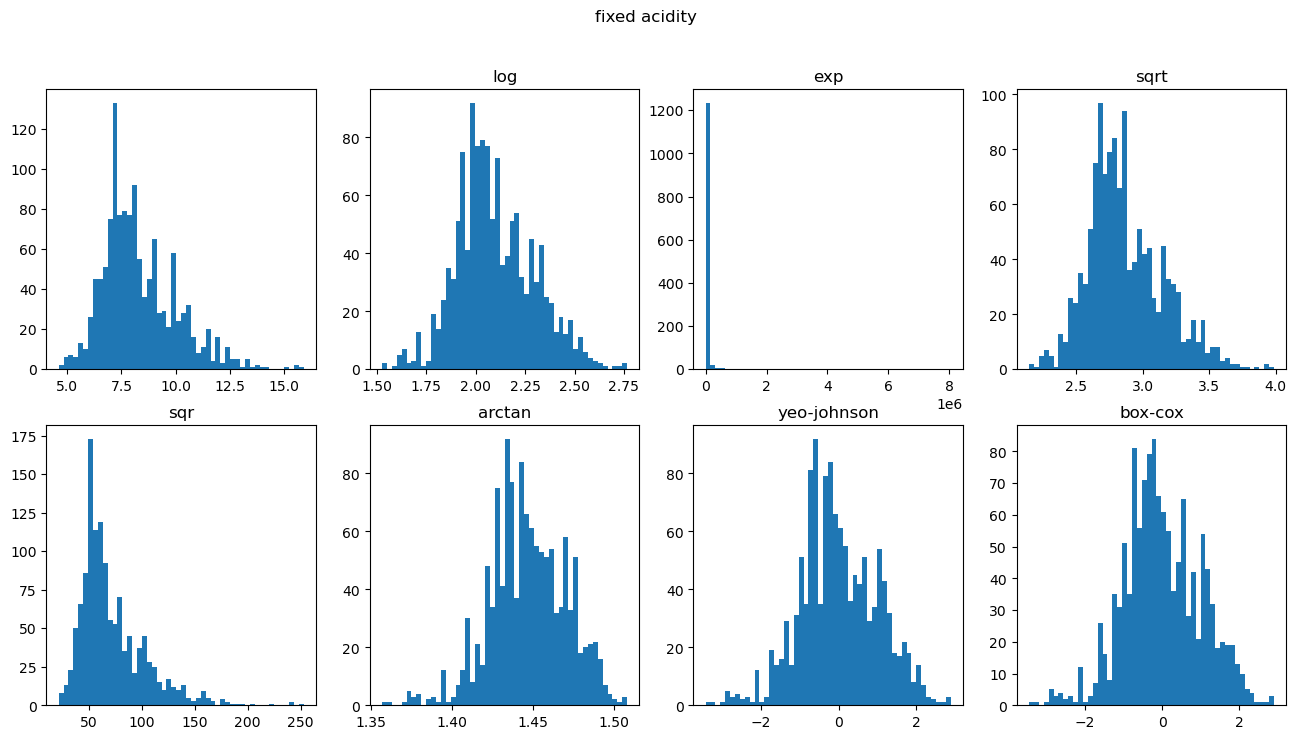

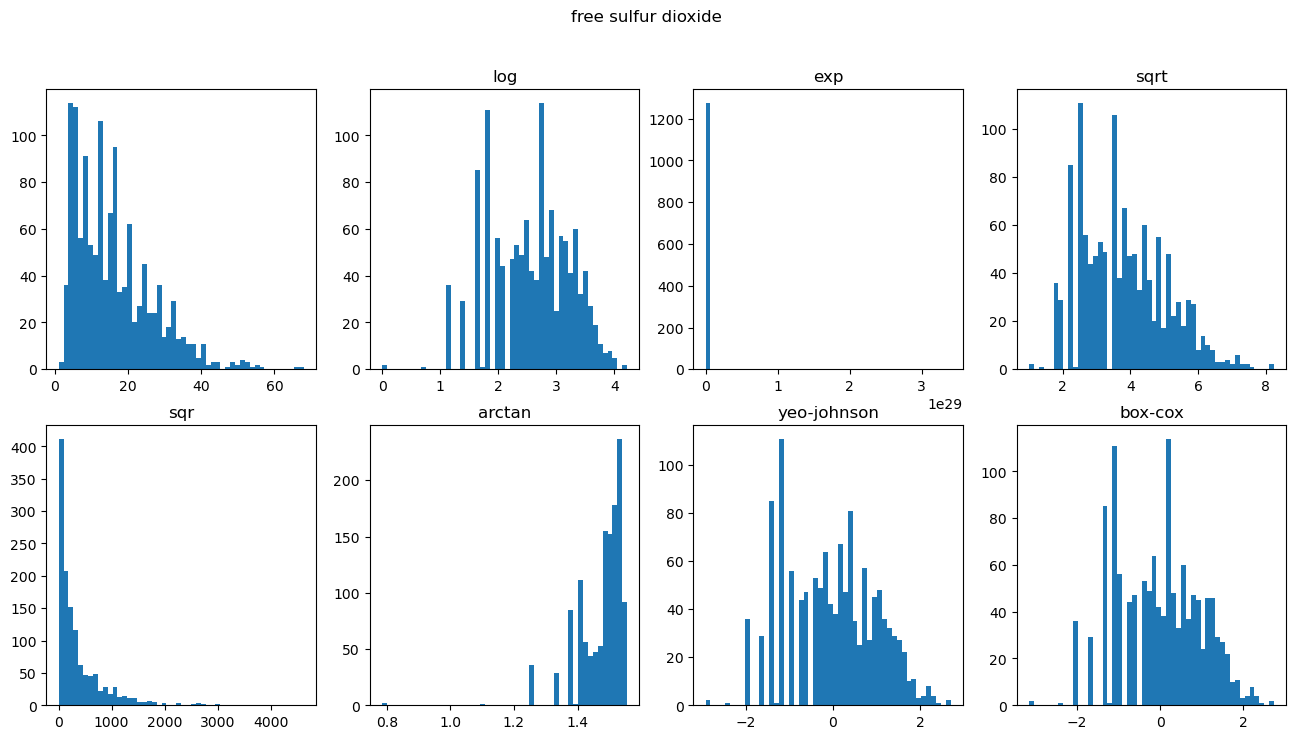

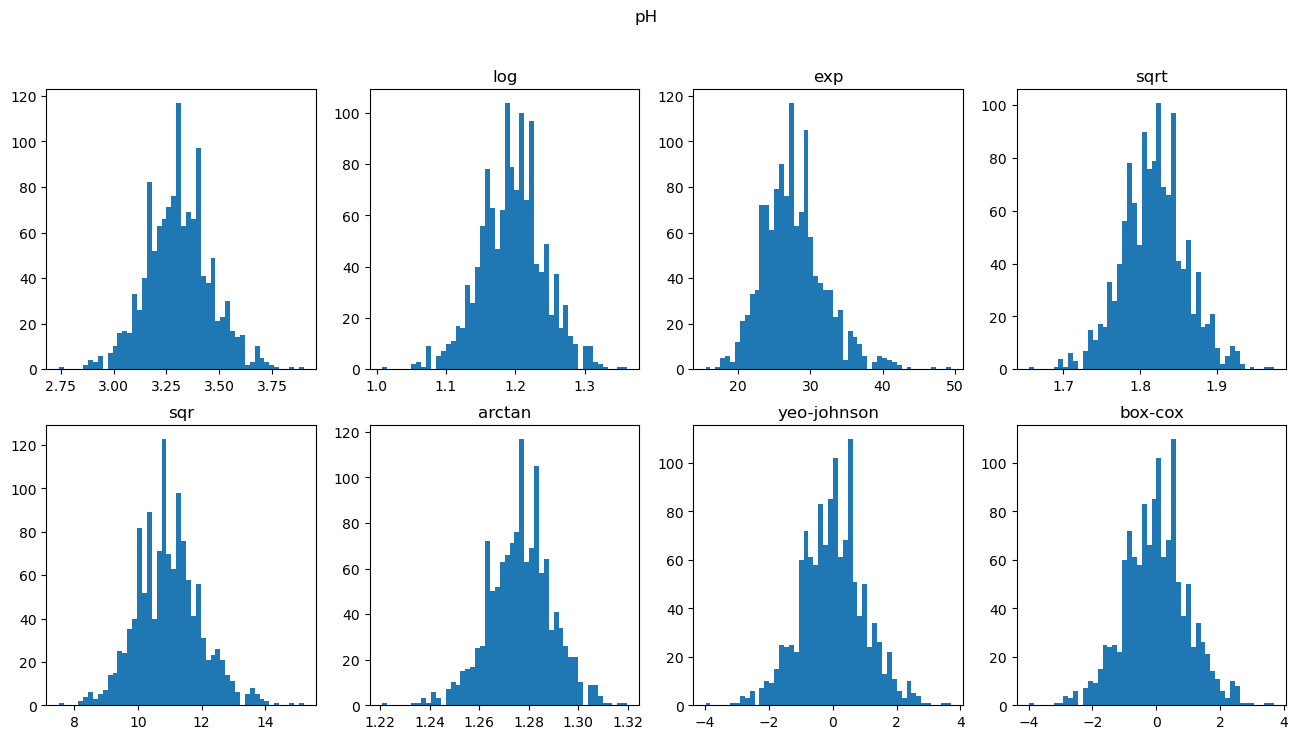

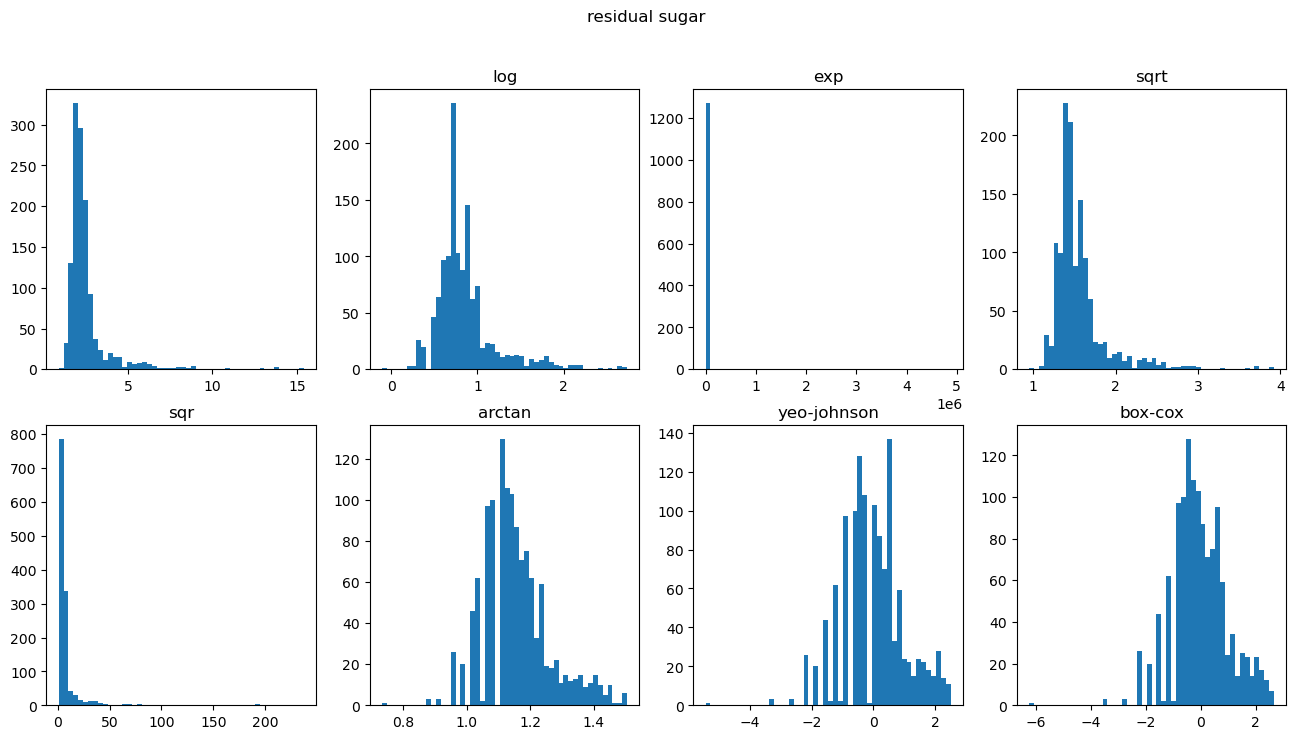

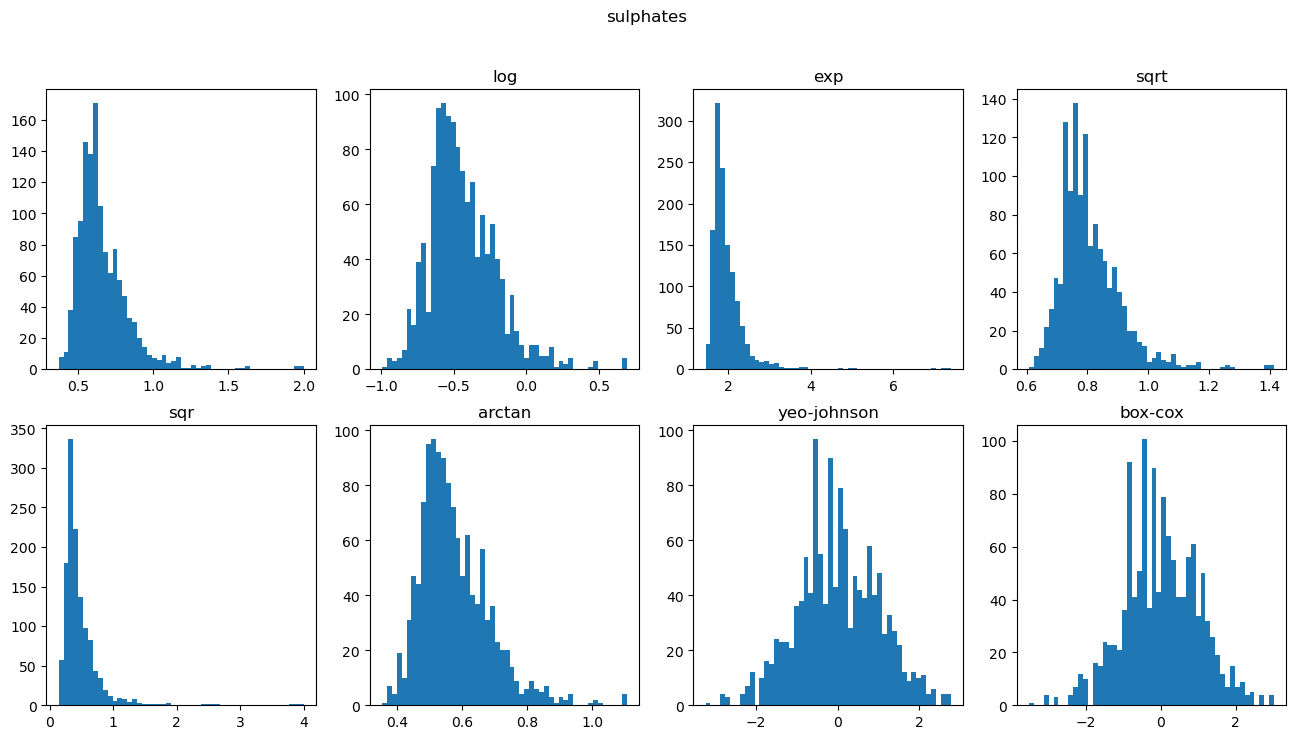

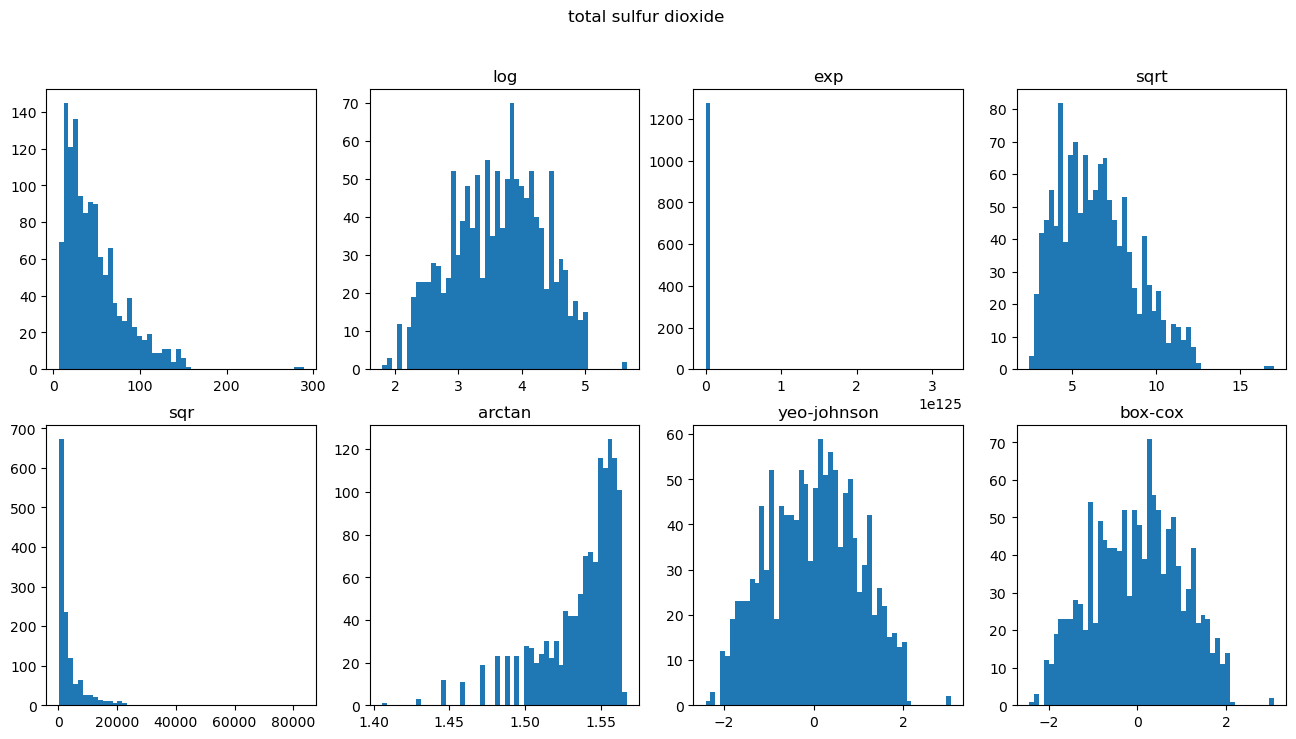

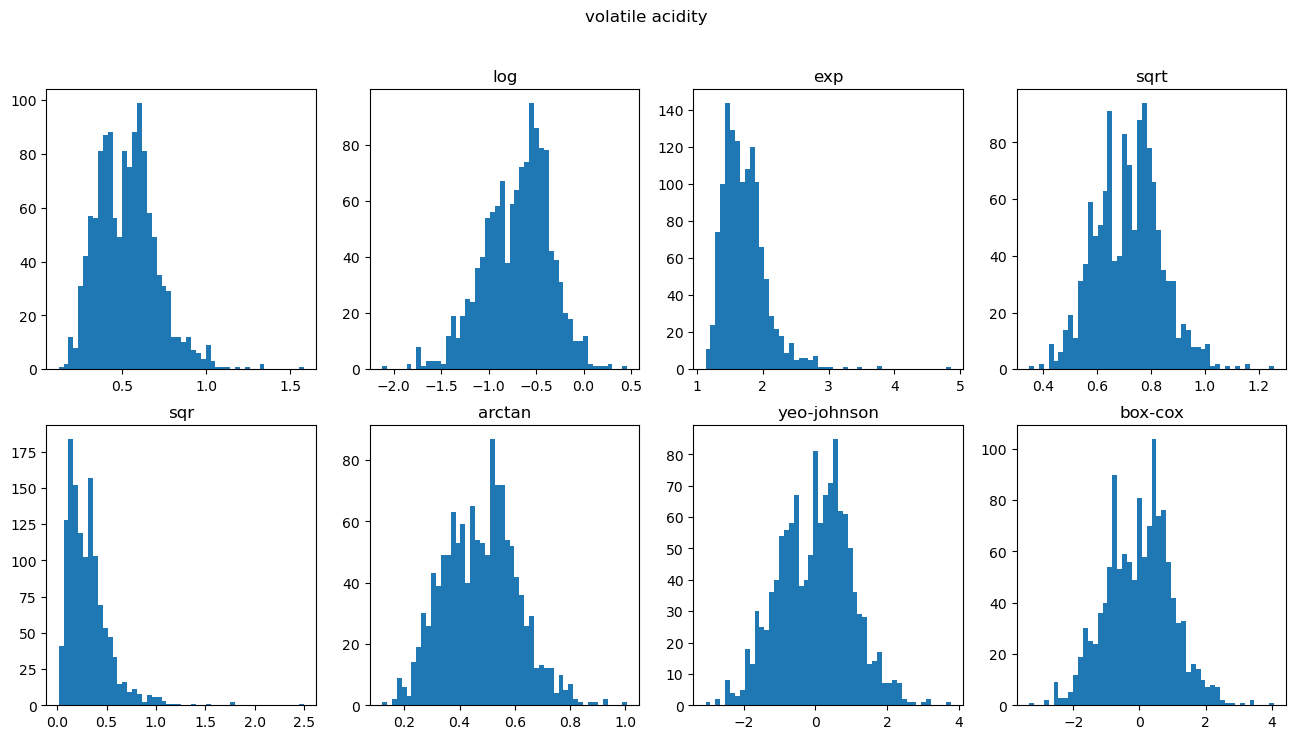

In [24]:
wp.transformations_compare(data_imputed)